# Disease Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
np.random.seed(1)

En primer lugar, vamos a importar los dos conjuntos de datos (Training y Testing) utilizando pandas.

In [2]:
train_df = pd.read_csv('Training.csv')

In [3]:
test_df = pd.read_csv('Testing.csv')

# Análisis exploratorio de datos

Para a empezar a explorar los datos vamos a observar las 5 primeras columnas de los dos DataFrames.

In [4]:
train_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [5]:
train_df.shape

(4920, 134)

In [6]:
test_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [7]:
test_df.shape

(42, 133)

Como podemos observar en la tabla, existe un columna con valores nulos en el conjunto de datos de entrenamiento. Por tanto, esta columna la eliminaremos posteriormente. 

Ambos dataset tienen 133 columnas, 132 corresponden a síntomas y la última corresponde al diagnóstico. 

Todas las características consisten en 0 y 1.

In [8]:
train_df=train_df.dropna(axis=1)

In [9]:
train_df.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [10]:
test_df.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

No hay valores perdidos en ninguno de los dos dataset.

In [11]:
train_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


Siempre que resolvamos una tarea de clasificación de debemos comprobar si la columna objetivo está equilibrada o no. Esto lo podemos realizar mediante el método .value_counts() o de forma gráfica con un countplot().

In [12]:
train_df['prognosis'].value_counts()

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

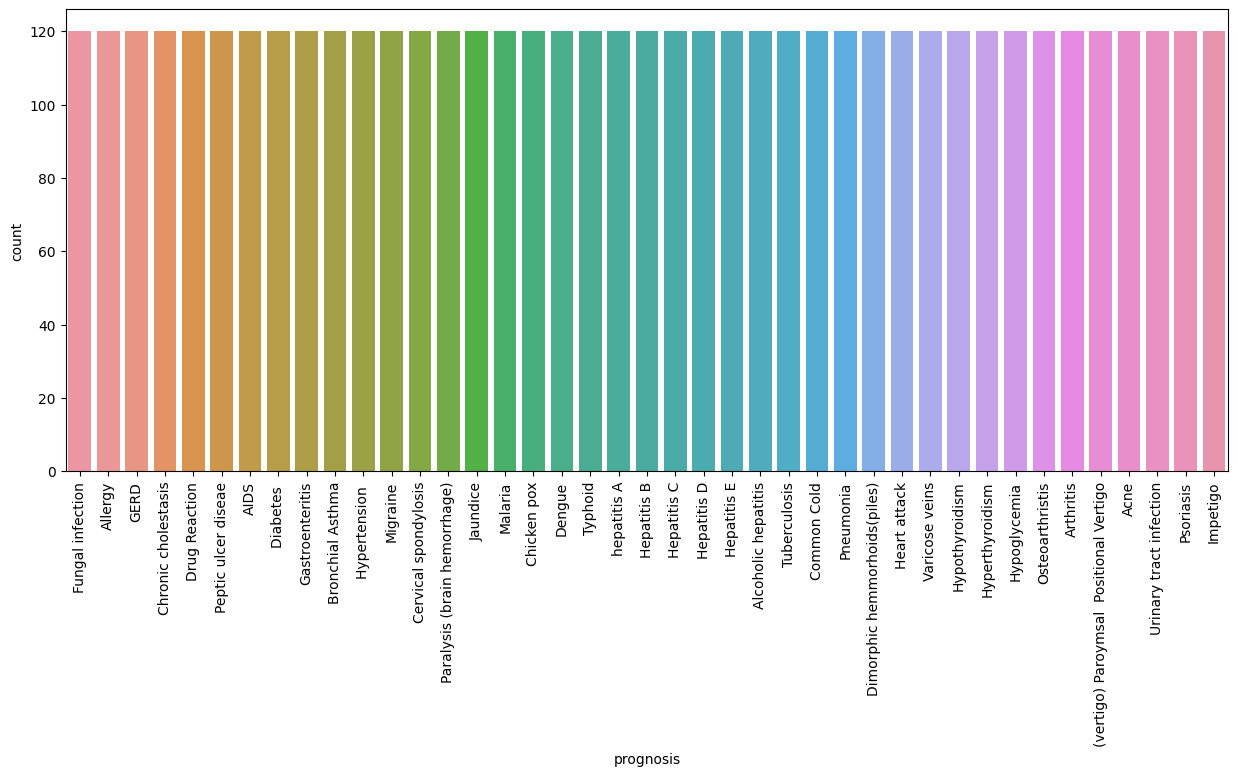

In [13]:
plt.figure(figsize=(15,6))
sns.countplot(x='prognosis', data=train_df)
plt.xticks(rotation=90)
plt.show()

Como podemos comprobar con ambos métodos, el conjunto de datos está equilibrado, hay 120 muestras para cada diagnóstico.

Ahora vamos a comprobar el tipo de datos de los síntomas usando el atributo .dtypes.

In [14]:
train_df.dtypes

itching                  int64
skin_rash                int64
nodal_skin_eruptions     int64
continuous_sneezing      int64
shivering                int64
                         ...  
inflammatory_nails       int64
blister                  int64
red_sore_around_nose     int64
yellow_crust_ooze        int64
prognosis               object
Length: 133, dtype: object

Observamos que la columna objetivo es del tipo objeto. Este tipo de dato no es adecuado para entrenar un modelo de machine learning, por tanto debemos convertir esta columna en tipo numérico. Para ello vamos a utilizar un codificador de etiquetas (LabelEncoder), que asignará un número entre 0 y n-1 a cada uno de los diagnósticos, siendo n el número total de diagnósticos.

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_df['prognosis']=le.fit_transform(train_df['prognosis'])
train_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


In [16]:
le = LabelEncoder()
test_df['prognosis']=le.fit_transform(test_df['prognosis'])
test_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,16
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,14


# Model

In [17]:
train_df=train_df.sample(frac=1).reset_index(drop=True)

Ahora que el conjunto de datos está preparado para entrenar el modelo, vamos a dividir los dos conjuntos de datos en X e y. La variable X contendrá todas las características, mientras que la variable y estará formada solo por el diagnóstico. 

In [18]:
X_train = train_df.drop('prognosis', axis=1)
y_train = train_df['prognosis']
X_test = test_df.drop('prognosis', axis=1)
y_test = test_df['prognosis']

In [19]:
X_train.columns.values

array(['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'spotting_ urination',
       'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets',
       'mood_swings', 'weight_loss', 'restlessness', 'lethargy',
       'patches_in_throat', 'irregular_sugar_level', 'cough',
       'high_fever', 'sunken_eyes', 'breathlessness', 'sweating',
       'dehydration', 'indigestion', 'headache', 'yellowish_skin',
       'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes',
       'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea',
       'mild_fever', 'yellow_urine', 'yellowing_of_eyes',
       'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach',
       'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision',
       'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_press

Vamos a evaluar 3 algoritmos: Random Forest Classifier, Support Vector Machine (SVM) y Naive Bayes Classifier.

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)
y_pred_rfc=rfc_model.predict(X_test)
print(f"Accuracy on test data by Random Forest Classifier: {accuracy_score(y_test, y_pred_rfc)}")
print(f"Classification report on test data by Random Forest Classifier: \
      {classification_report(y_test, y_pred_rfc)}")

Accuracy on test data by Random Forest Classifier: 0.9761904761904762
Classification report on test data by Random Forest Classifier:                     precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00      

In [21]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm=svm_model.predict(X_test)
print(f"Accuracy on test data by SVM Classifier: {accuracy_score(y_test, y_pred_svm)}")
print(f"Classification report on test data by SVM Classifier: \
      {classification_report(y_test, y_pred_svm)}")

Accuracy on test data by SVM Classifier: 1.0
Classification report on test data by SVM Classifier:                     precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1

In [22]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb=nb_model.predict(X_test)
print(f"Accuracy on test data by Naive Bayes Classifier: {accuracy_score(y_test, y_pred_nb)}")
print(f"Classfication report on test data by Naive Bayes Classifier: \
      {classification_report(y_test, y_pred_nb)}")

Accuracy on test data by Naive Bayes Classifier: 1.0
Classfication report on test data by Naive Bayes Classifier:                     precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15   

De los resultados anteriores podemos extraer que tanto el algoritmo SVC como el GaussianNB son buenas opciones para clasificar los síntomas en los diferentes diagnósticos.

In [23]:
symptoms = X_train.columns.values

symptom_index ={}
for index, value in enumerate(symptoms):
    symptom=" ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index
    
data_dict = {
    "symptom_index": symptom_index,
    "predictions_classes": le.classes_
}

def predictDisease(symptoms):
    symptoms = symptoms.split(", ")
    
    input_data= [0] * len(data_dict['symptom_index'])
    for symptom in symptoms:
        index = data_dict['symptom_index'][symptom]
        input_data[index]=1
        
    input_data=np.array(input_data).reshape(1,-1)
    
    predictions = data_dict['predictions_classes'][svm_model.predict(input_data)[0]]
    
    return predictions

In [24]:
predictDisease("Stomach Pain, Acidity, Ulcers On Tongue")

'GERD'